In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [ ]:
#On fixe aujourd'hui comme la date de la fin 
end_date = datetime.today()

#Sla date de la fin 4 ans en arriere
start_date = datetime(end_date.year-4,end_date.month,end_date.day)
#using yahoo finance to grab cryptocurrency data

BTC = pdr.DataReader('BTC-USD','yahoo',start_date,end_date)#Bitcoin
ETH = pdr.DataReader('ETH-USD','yahoo',start_date,end_date)#Ethereum
LTC = pdr.DataReader('LTC-USD','yahoo',start_date,end_date)#Litecon

In [ ]:
df=BTC
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-22,629.327026,558.138977,597.442993,623.976990,2.534620e+08,623.976990
2016-06-23,681.726990,625.271973,625.575012,665.299011,2.243170e+08,665.299011
2016-06-24,691.731018,646.559021,665.281006,665.122986,1.266560e+08,665.122986
2016-06-25,665.979980,616.934021,665.931030,629.367004,1.092250e+08,629.367004
2016-06-26,655.275024,620.523987,629.348999,655.275024,1.221340e+08,655.275024
...,...,...,...,...,...,...
2020-06-16,9540.422852,9327.339844,9533.784180,9480.254883,2.017771e+10,9480.254883
2020-06-17,9482.782227,9328.395508,9481.567383,9411.840820,1.777008e+10,9411.840820
2020-06-18,9440.875977,9274.295898,9410.293945,9288.018555,1.963222e+10,9288.018555


In [ ]:
df=df.drop(df.columns[[0,1,2,4,5]],axis='columns')
df.tail()

,Close
Date,
2020-06-16,9480.254883
2020-06-17,9411.840820
2020-06-18,9288.018555
2020-06-20,9303.629883
2020-06-23,9653.162109


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1460 entries, 2016-06-22 to 2020-06-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1460 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


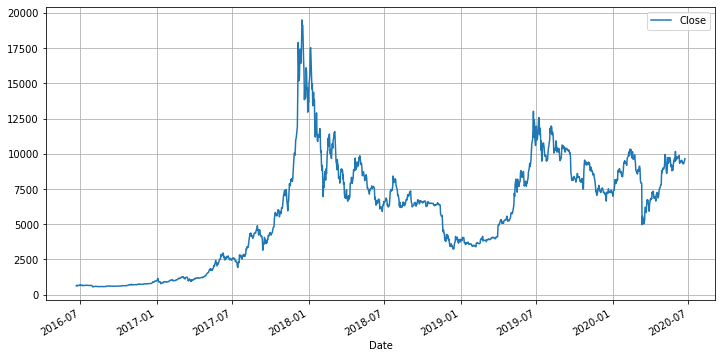

In [ ]:
df.plot(y= 'Close', figsize=(12,6), legend=True, grid=True, use_index=True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) #Values between 0 nd 1
df=scaler.fit_transform(np.array(df).reshape(-1,1) )#reshaping so we can parsing

In [ ]:
train_size=int(len(df)*0.9)
test_size=len(df)-train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]

In [ ]:
def create_dataset(dataset, step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]   ###i=0, 0,1,2,3-----99   100 #time step =100 
        dataX.append(a)#99
        dataY.append(dataset[i + step, 0])#100
    return np.array(dataX), np.array(dataY)

In [ ]:
step = 100 #previous obs 
X_train, y_train = create_dataset(train_data, step)
X_test, y_test = create_dataset(test_data, step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
x=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 4s 214ms/step - loss: 0.0276 - val_loss: 0.0106
Epoch 2/100
19/19 [==============================] - 3s 171ms/step - loss: 0.0046 - val_loss: 8.5065e-04
Epoch 3/100
19/19 [==============================] - 3s 172ms/step - loss: 0.0030 - val_loss: 0.0010
Epoch 4/100
19/19 [==============================] - 3s 169ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 5/100
19/19 [==============================] - 3s 170ms/step - loss: 0.0026 - val_loss: 6.5359e-04
Epoch 6/100
19/19 [==============================] - 3s 167ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 7/100
19/19 [==============================] - 3s 169ms/step - loss: 0.0022 - val_loss: 5.7865e-04
Epoch 8/100
19/19 [==============================] - 3s 167ms/step - loss: 0.0019 - val_loss: 6.0194e-04
Epoch 9/100
19/19 [==============================] - 3s 170ms/step - loss: 0.0019 - val_loss: 5.4375e-04
Epoch 10/100
19/19 [==============================] - 3s 167ms/step - l

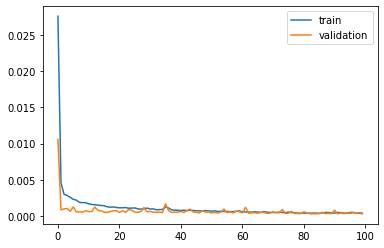

In [ ]:
plt.plot(x.history['loss'],label='train')
plt.plot(x.history['val_loss'],label='validation')
plt.legend();

In [ ]:
### Faisons quelques prédictions
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

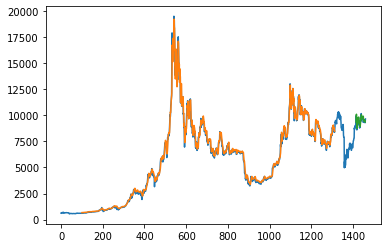

In [ ]:
# ### Plotting 
# décalage de train (shift)
past=100
train_pred = np.empty_like(df)#Return a new array with the same shape and type as a given array.
train_pred[:, :] =  np.nan#Numpy function to avoid NaN values
train_pred[past:len(train_predict)+past, :] = train_predict
# shift test predictions for plotting
test_pred = np.empty_like(df)
test_pred[:, :] = np.nan
test_pred[len(train_predict)+(past*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions

plt.plot(scaler.inverse_transform(df))#blue my df
plt.plot(train_pred)#orange :train prediction
plt.plot(test_pred)#green : test prediction

plt.show()

In [ ]:
input=test_data[len(test_data)-past:].reshape(1,-1)
input.shape

(1, 100)

In [ ]:
temp_input=list(input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

output=[]
steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        input=np.array(temp_input[1:])
        print("in the day {} our input is {}".format(i,input))
        input=input.reshape(1,-1)
        input = input.reshape((1, steps, 1))
        #print(input)
        y_pred = model.predict(input, verbose=0)
        print("in the day {} our output is {}".format(i,y_pred))
        temp_input.extend(y_pred[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output.extend(y_pred.tolist())
        i=i+1
    else:
        input = input.reshape((1, steps,1))
        y_pred = model.predict(input, verbose=0)
        print(y_pred[0])
        temp_input.extend(y_pred[0].tolist())
        print(len(temp_input))
        output.extend(y_pred.tolist())
        i=i+1
    

print(output)

[0.47772813]
101
in the day 1 our input is [0.25566578 0.23572719 0.24686967 0.24754562 0.29782307 0.29822335
 0.29749977 0.27877614 0.3097029  0.32650975 0.32367382 0.32554071
 0.31252525 0.30051442 0.31041672 0.28361986 0.31088125 0.31975367
 0.32961376 0.326435   0.33351366 0.32948209 0.35484639 0.34981383
 0.35813492 0.35644577 0.33340632 0.33306805 0.33897882 0.33232686
 0.33218914 0.32161824 0.34666816 0.34558005 0.35410147 0.35050039
 0.3342752  0.33418891 0.34668944 0.36318116 0.36957571 0.37058021
 0.37638135 0.38248869 0.38309332 0.43554624 0.42802725 0.43890923
 0.44544382 0.44063494 0.4414363  0.44620761 0.46022831 0.49625782
 0.4905136  0.47738587 0.43319228 0.4250321  0.43572774 0.46029298
 0.48476454 0.46336476 0.46594083 0.48144092 0.48438741 0.48451738
 0.47364364 0.4503602  0.45568029 0.4570898  0.43498318 0.44113446
 0.43734121 0.45559799 0.47378979 0.46921843 0.48300687 0.47037594
 0.50764308 0.47400366 0.48070099 0.48829569 0.48116619 0.48054067
 0.48609071 0.48675

In [ ]:
#On va l'utiliser dans le plot si non les courbes seront inversées)
new=np.arange(1,101)
pred=np.arange(101,131)

In [ ]:
scaler.inverse_transform(output)

array([[ 9600.38218212],
       [ 9664.50695738],
       [ 9702.06297089],
       [ 9733.26665298],
       [ 9760.73958281],
       [ 9786.70575407],
       [ 9812.8645058 ],
       [ 9840.06240137],
       [ 9868.35591597],
       [ 9897.26162183],
       [ 9926.02783393],
       [ 9953.8797124 ],
       [ 9980.17739314],
       [10004.51707841],
       [10026.7338606 ],
       [10046.87517889],
       [10065.13700224],
       [10081.78928216],
       [10097.12681923],
       [10111.41278792],
       [10124.85727601],
       [10137.61502556],
       [10149.78091493],
       [10161.41254883],
       [10172.53703536],
       [10183.16792857],
       [10193.31313499],
       [10202.98169065],
       [10212.18150208],
       [10220.92838234]])

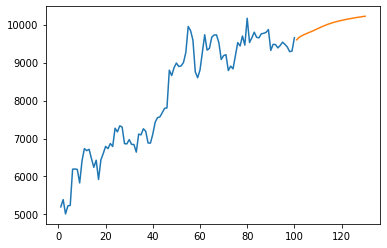

In [ ]:
plt.plot(new,scaler.inverse_transform(df[len(df)-past:]))#previous 100 data
plt.plot(pred,scaler.inverse_transform(output))

In [ ]:
df1=df.tolist()
df1.extend(output)

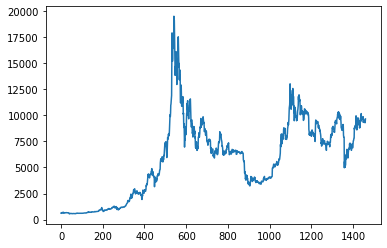

In [ ]:
df1=scaler.inverse_transform(df1)
plt.plot(df1[:len(df)])#on plot que demain pas les treintes

In [ ]:
if df1[len(df)]>df1[len(df)-1]:
    print("D'après notre modèle demain le cours sera plus élévé que celui d'aujourd'hui")
else:
    print("D'après notre modèle demain le cours sera plus bas que celui d'aujourd'hui ")
print("Le cours  aujourd'hui est : ",df1[len(df)-1])
print("Le cours  demain sera : ",df1[len(df)])

D'après notre modèle demain le cours sera plus bas que celui d'aujourd'hui 
Le cours  aujourd'hui est :  [9653.16210938]
Le cours  demain sera :  [9600.38218212]


In [ ]:

y_train=y_train.reshape(-1,1) 
y_test=y_test.reshape(-1,1) 

In [ ]:
y_train=scaler.inverse_transform(y_train)
y_test=scaler.inverse_transform(y_test)


array([[ 9951.51855469],
       [ 9842.66601562],
       [ 9593.89648438],
       [ 8756.43066406],
       [ 8601.79589844],
       [ 8804.47753906],
       [ 9269.98730469],
       [ 9733.72167969],
       [ 9328.19726562],
       [ 9377.01367188],
       [ 9670.73925781],
       [ 9726.57519531],
       [ 9729.03808594],
       [ 9522.98144531],
       [ 9081.76171875],
       [ 9182.57714844],
       [ 9209.28710938],
       [ 8790.36816406],
       [ 8906.93457031],
       [ 8835.05273438],
       [ 9181.01757812],
       [ 9525.75097656],
       [ 9439.12402344],
       [ 9700.4140625 ],
       [ 9461.05859375],
       [10167.26855469],
       [ 9529.80371094],
       [ 9656.71777344],
       [ 9800.63671875],
       [ 9665.53320312],
       [ 9653.6796875 ],
       [ 9758.85253906],
       [ 9771.48925781],
       [ 9795.70019531],
       [ 9870.09472656],
       [ 9321.78125   ],
       [ 9480.84375   ],
       [ 9475.27734375],
       [ 9386.78808594],
       [ 9450.70214844],


Metrics

In [ ]:
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(y_test,test_predict)
print("MSE_test: " , (mse_test))
mse_train=mean_squared_error(y_train, train_predict)
print("MSE_train: " , (mse_train))


MSE_test:  112494.55575298738
MSE_train:  132621.87174651123


In [ ]:
rmse_test = np.sqrt(mse_test)
print("RMSE_test: %f" % (rmse_test))

rmse_train = np.sqrt(mean_squared_error(y_train, train_predict))
print("RMSE_train: %f" % (rmse_train))

RMSE_test: 335.402081
RMSE_train: 364.172860


In [ ]:
from sklearn.metrics import mean_absolute_error
mae_test=mean_absolute_error(y_test,test_predict)
print("MAE_test: " , (mae_test))
mae_train=mean_absolute_error(y_train, train_predict)
print("MAE_train: " , (mae_train))

MAE_test:  233.5536458333334
MAE_train:  214.97263129250825


In [ ]:
#MAPE
mape_test = np.mean(np.abs((y_test- test_predict)/y_test))  
print("MAPE_test: " , (mape_test))
mape_train=np.mean(np.abs((y_train- train_predict)/y_train))  
print("MAPE_train: " , (mape_train))

MAPE_test:  0.02502026278646091
MAPE_train:  0.040505965175137486


In [ ]:
#MPE
mpe_test = np.mean((y_test- test_predict)/y_test)
print("MPE_test: " , (mpe_test))
mpe_train=np.mean((y_train- train_predict)/y_train)  
print("MPE_train: " , (mpe_train))

MPE_test:  -0.009736506314250734
MPE_train:  -0.02014908837344736
